In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

# Class imbalance

- What is it?
- How can we deal with it?
    - before training: in train-test-split, undersampling, oversampling
    - during training: setting class_weights
    - after training: precision recall curve, ROC-curve


## What is it?

In [2]:
df = pd.read_csv('/media/mmuratardag/Depo/2021_01_03_Spiced_DS/tensor-tarragon-student-code/large_DFs/creditcardfraud.zip', index_col=0) # Please do not unzip the creditcardfraud.zip
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,,,,,,,,,,,,,,,,,,,,,
0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 30)

In [4]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

#### Before training

In [5]:
X = df.iloc[:,:-1]
y = df['Class']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)

In [7]:
X_test.shape

(71202, 29)

#### Build a simple baseline model 

In [8]:
ypred_bl = [0] * X_train.shape[0]

In [9]:
ypred_bl

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [10]:
accuracy_score(ypred_bl, y_train)

0.9982725123475574

<AxesSubplot:>

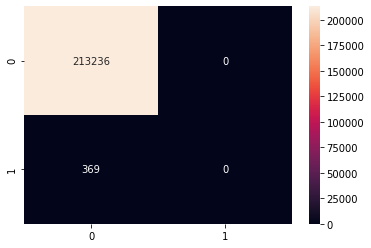

In [11]:
sns.heatmap(confusion_matrix(y_train, ypred_bl), annot=True, fmt='.0f')

In [12]:
recall_score(y_train, ypred_bl)

0.0

## How can we deal with Imbalanced Classes?

In [13]:
def print_evaluations(ytrue, ypred, model):
    '''
    Prints the confusion matrix and some evaluation metrics for 
    a specified model.
    
    Parameters:
    -----------
    ytrue : The true y-values
    ypred : The predicted y-values
    model : The model used to make the predictions: str
    '''
    
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    fig = plt.figure(figsize=(7, 6))
    cm = confusion_matrix(ytrue, ypred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt='.0f', ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['non-fraud', 'fraud'])
    ax.yaxis.set_ticklabels(['non-fraud', 'fraud'])

#### Compare baseline model to a random forest classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

In [15]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [16]:
ypred_rf = rf.predict(X_test)

How does model RandomForest score:
The accuracy of the model is: 0.999
The precision of the model is: 0.862
The recall of the model is: 0.61
The f1-score of the model is: 0.714


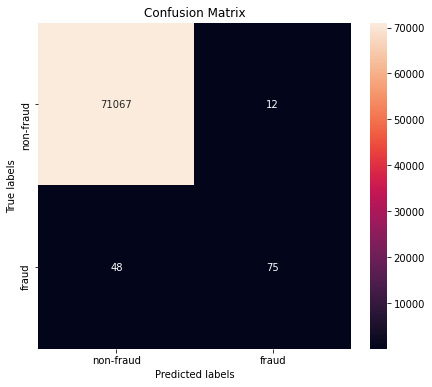

In [17]:
print_evaluations(y_test, ypred_rf, 'RandomForest')

### Use Undersampling
ONLY UNDER/OVERSAMPLE YOUR TRAINING DATA

In [18]:
# also check out e.g. Tomek-links

In [19]:
!pip install imbalanced-learn

In [20]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss  

In [21]:
# Instantiate both resamplers
rus = RandomUnderSampler(sampling_strategy='majority') # {0: 20_000}
nm = NearMiss(sampling_strategy='majority')

In [22]:
# Resample according to both resamplers
X_rus, y_rus = rus.fit_resample(X_train, y_train)
X_nm, y_nm = nm.fit_resample(X_train, y_train)

In [23]:
X_rus.shape

(738, 29)

How does model RandomUndersampling score:
The accuracy of the model is: 0.988
The precision of the model is: 0.114
The recall of the model is: 0.878
The f1-score of the model is: 0.202


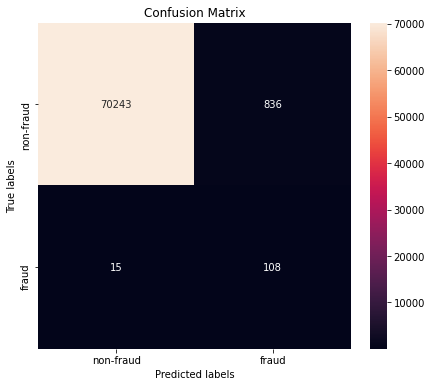

In [24]:
# Fit Random Undersampled data, predict and inspect 
rf.fit(X_rus, y_rus)
ypred_rus = rf.predict(X_test)
print_evaluations(y_test, ypred_rus, 'RandomUndersampling')

How does model NearMiss score:
The accuracy of the model is: 0.103
The precision of the model is: 0.002
The recall of the model is: 0.984
The f1-score of the model is: 0.004


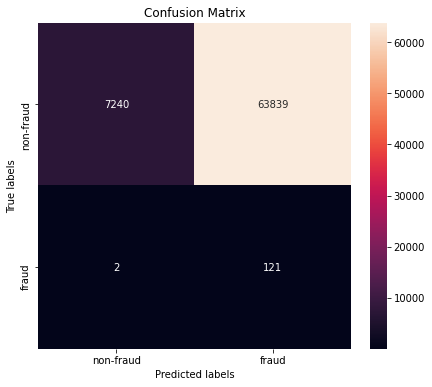

In [25]:
# Fit Near Miss-transformed data, predict and inspect 
rf.fit(X_nm, y_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'NearMiss')

### Use Oversampling

In [26]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [27]:
# Instantiate both
ros = RandomOverSampler(sampling_strategy={1: 2000})
sm = SMOTE(sampling_strategy={1: 2000})

In [28]:
# Fit both
X_ros, y_ros = ros.fit_resample(X_train, y_train)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

How does model RandomOversampling score:
The accuracy of the model is: 0.999
The precision of the model is: 0.861
The recall of the model is: 0.707
The f1-score of the model is: 0.777


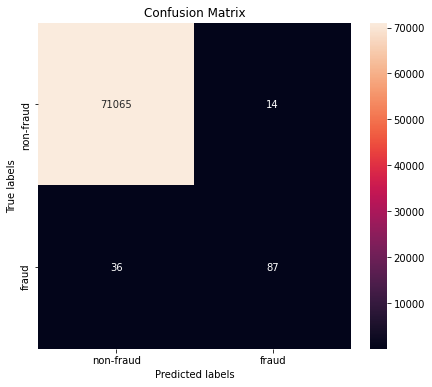

In [45]:
# Fit Random Oversampled data, predict and inspect 
rf.fit(X_ros, y_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'RandomOversampling')

How does model SMOTE score:
The accuracy of the model is: 0.999
The precision of the model is: 0.874
The recall of the model is: 0.732
The f1-score of the model is: 0.796


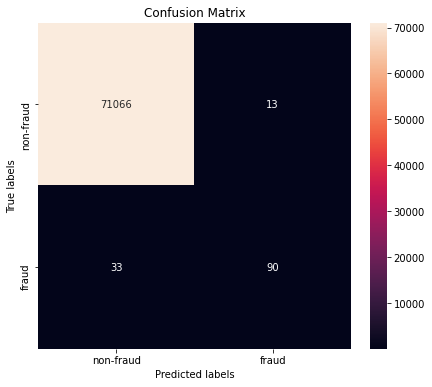

In [46]:
# Fit SMOTE, predict and inspect
rf.fit(X_sm, y_sm)
ypred_sm = rf.predict(X_test)
print_evaluations(y_test, ypred_sm, 'SMOTE')

In [ ]:
# to use in a pipeline, use this instead of the sklearn-pipline:
from imblearn.pipeline import Pipeline

## During Training

In [50]:
rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10, class_weight='balanced')

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, n_estimators=20,
                       random_state=10)

In [52]:
ypred_rf = rf.predict(X_test)

How does model RandomForest score:
The accuracy of the model is: 0.994
The precision of the model is: 0.19
The recall of the model is: 0.846
The f1-score of the model is: 0.31


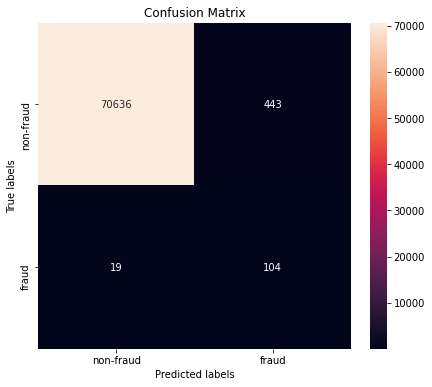

In [53]:
print_evaluations(y_test, ypred_rf, 'RandomForest')

## [After training]

Precision-recall curves are a useful measure if we deal with class imbalance. The curve shows the tradeoff between precision and recall, for different threshholds.

In [60]:
rf.predict(X_train)

array([0, 0, 0, ..., 0, 0, 0])

In [61]:
rf.predict_proba(X_test)

array([[0.88512403, 0.11487597],
       [0.91888953, 0.08111047],
       [0.89969453, 0.10030547],
       ...,
       [0.912554  , 0.087446  ],
       [0.93933821, 0.06066179],
       [0.77107009, 0.22892991]])

In [ ]:
# import one of these to plot the precision-recall-curve
from sklearn.metrics import plot_precision_recall_curve, precision_recall_curve